# Kaggle Bike sharing

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.


datetime – hourly date + timestamp <br>
season –  1 = spring, 2 = summer, 3 = fall, 4 = winter <br>
holiday – whether the day is considered a holiday <br>
workingday – whether the day is neither a weekend nor holiday <br>
weather: <br>

1 Clear, Few clouds, Partly cloudy, Partly cloudy <br>
2 Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br>
3 Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br>
4 Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>
temp – temperature in Celsius <br>
atemp – “feels like” temperature in Celsius <br>
humidity – relative humidity <br>
windspeed – wind speed <br>
casual – number of non-registered user rentals initiated <br>
registered – number of registered user rentals initiated <br>
count – number of total rentals <br>



https://www.kaggle.com/c/bike-sharing-demand

# Data  Exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<font color = red> Explicitly pass header=0 to be able to replace existing names.</font>


In [3]:
df_train = pd.read_csv('kaggle_bike_competition_train.csv',header = 0)

In [4]:
df_train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [9]:
df_train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [10]:
df_train.shape

(10886, 12)

In [11]:
df_train.count()

datetime      10886
season        10886
holiday       10886
workingday    10886
weather       10886
temp          10886
atemp         10886
humidity      10886
windspeed     10886
casual        10886
registered    10886
count         10886
dtype: int64

In [12]:
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [13]:
# Add month day and hous as three new columns
df_train['month'] = pd.DatetimeIndex(df_train.datetime).month
df_train['day'] = pd.DatetimeIndex(df_train.datetime).dayofweek
df_train['hour'] = pd.DatetimeIndex(df_train.datetime).hour

In [14]:
df_train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,5,4
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,1,5,5
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,1,5,6
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,1,5,7
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,1,5,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,1,5,9


**<font color=red>remove datetime</font>**<br>

In [15]:
# save as a backup just in case
#df_train_origin = df_train
df_train = df_train.drop('datetime',axis=1)

In [16]:
df_train.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,5,4


In [17]:
df_train.shape

(10886, 14)

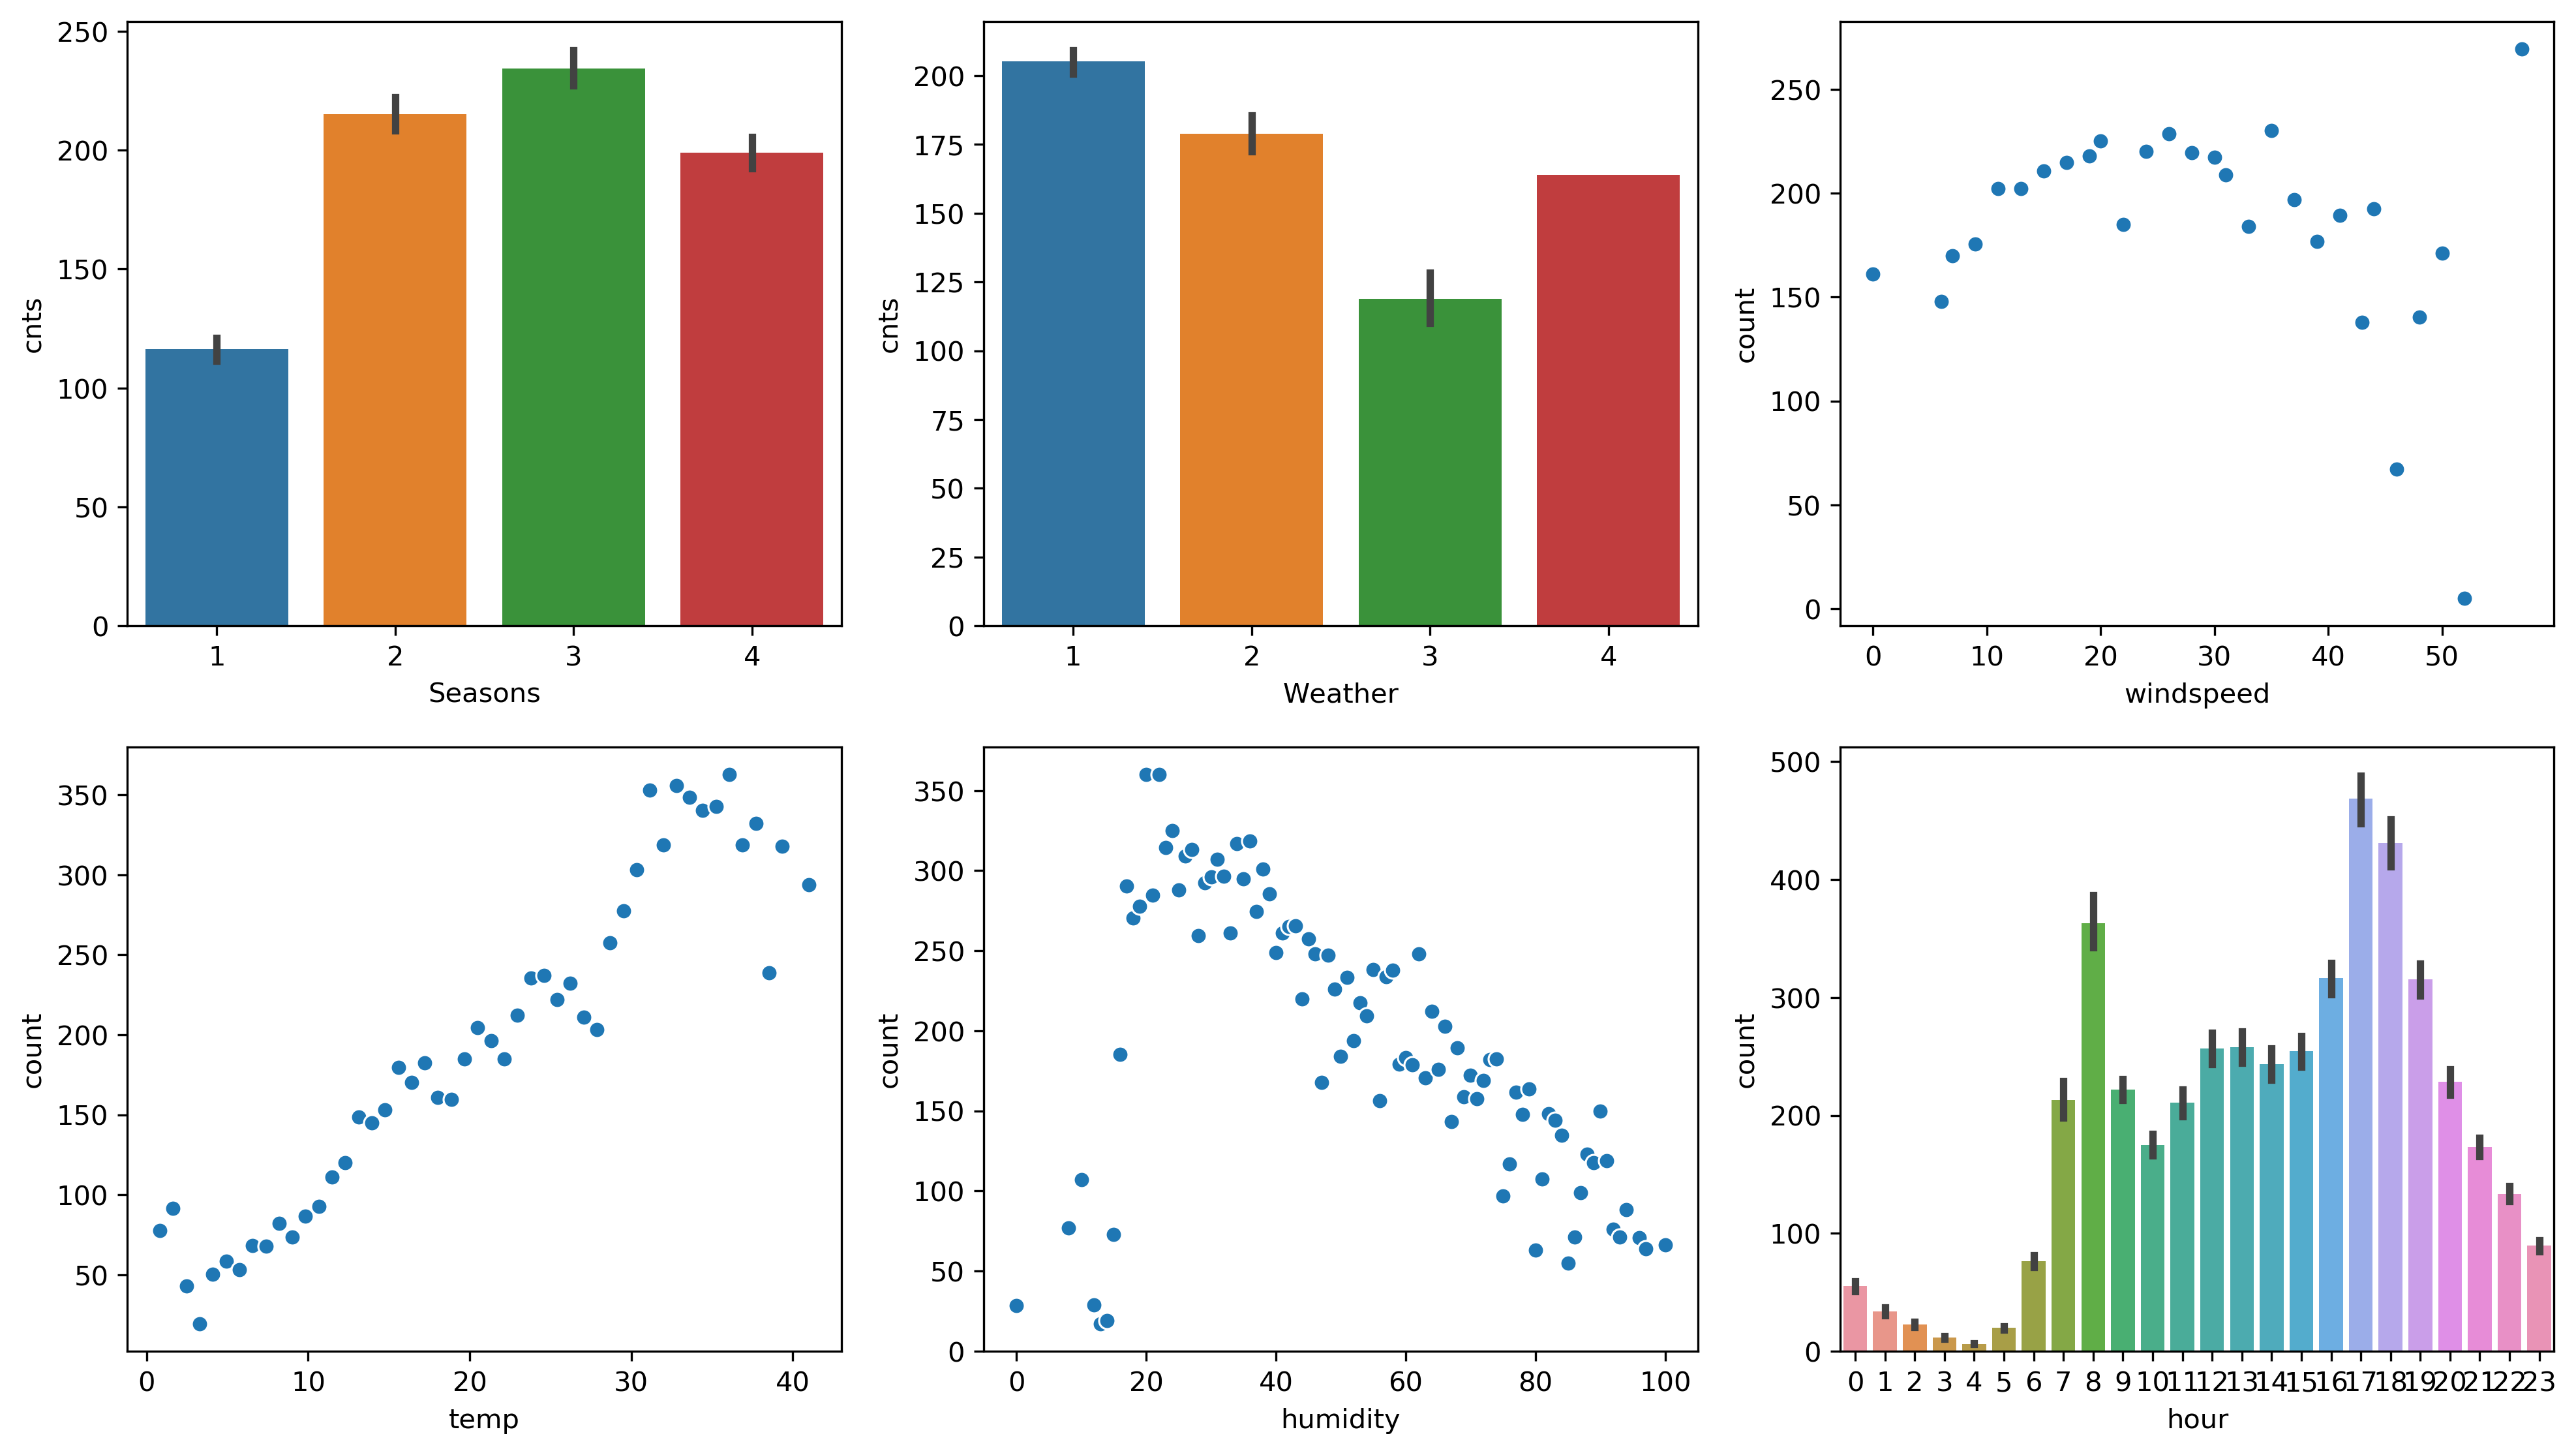

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (16,9),dpi = 300)
        
plt.subplot2grid((2,3),(0,0))
sns.barplot(x='season', y='count', data=df_train)
plt.xlabel("Seasons")  
plt.ylabel("cnts")  

plt.subplot2grid((2,3),(0,1))
sns.barplot(x='weather', y='count', data=df_train)
plt.xlabel("Weather")  
plt.ylabel("cnts") 

plt.subplot2grid((2,3),(0,2))
wind = df_train.groupby('windspeed').mean()
sns.scatterplot(x = wind.index.get_level_values('windspeed'), y = 'count', data =wind)

plt.subplot2grid((2,3),(1,0))
temp = df_train.groupby('temp').mean()
sns.scatterplot(x = temp.index.get_level_values('temp'), y = 'count', data =temp)

plt.subplot2grid((2,3),(1,1))
humidity = df_train.groupby('humidity').mean()
sns.scatterplot(x = humidity.index.get_level_values('humidity'), y = 'count', data =humidity)

plt.subplot2grid((2,3),(1,2))
sns.barplot(x = ('hour'), y = 'count', data =df_train)


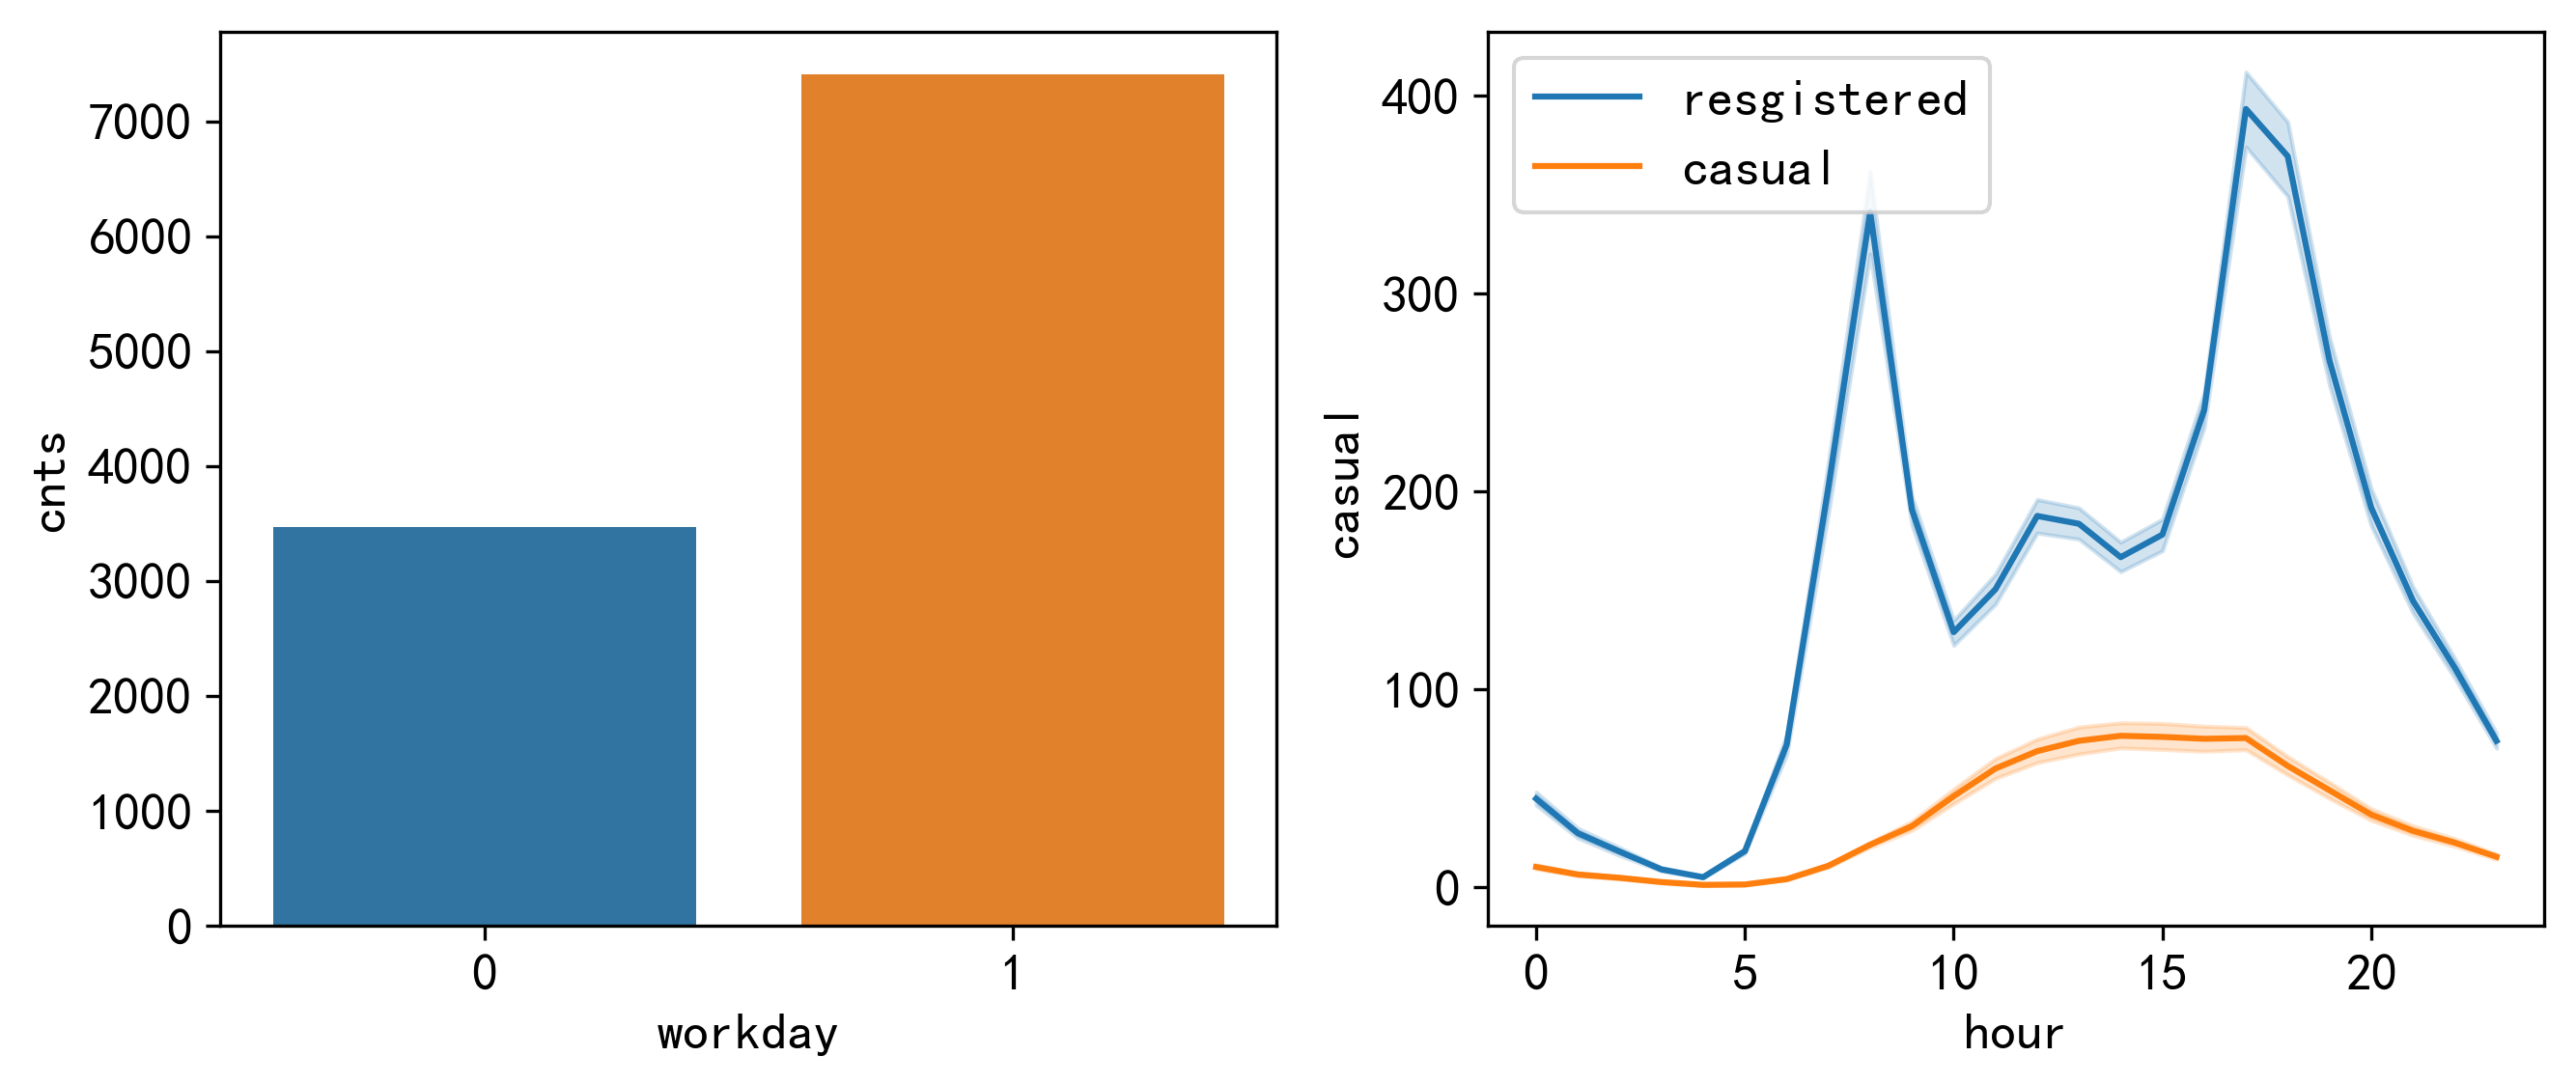

In [106]:
fig = plt.figure(figsize = (16,9),dpi = 300)
        
plt.subplot2grid((2,3),(0,0))
sns.countplot(df_train.workingday.values, order=[0, 1]);
plt.xlabel('workday');
plt.ylabel('cnts');

plt.subplot2grid((2,3),(0,1))
sns.lineplot(x = 'hour' ,y ='registered',data = df_train,label = 'resgistered')
sns.lineplot(x = 'hour' ,y ='casual',data = df_train,label = 'casual')



In [51]:
#correlation
corr = df_train[['temp','weather','windspeed','day', 'month', 'hour','count']].corr()
corr

,temp,weather,windspeed,day,month,hour,count
temp,1.000000,-0.055035,-0.017852,-0.038466,0.257589,0.145430,0.394454
weather,-0.055035,1.000000,0.007261,-0.047692,0.012144,-0.022740,-0.128655
windspeed,-0.017852,0.007261,1.000000,-0.024804,-0.150192,0.146631,0.101369
day,-0.038466,-0.047692,-0.024804,1.000000,-0.002266,-0.002925,-0.002283
month,0.257589,0.012144,-0.150192,-0.002266,1.000000,-0.006818,0.166862
hour,0.145430,-0.022740,0.146631,-0.002925,-0.006818,1.000000,0.400601
count,0.394454,-0.128655,0.101369,-0.002283,0.166862,0.400601,1.000000


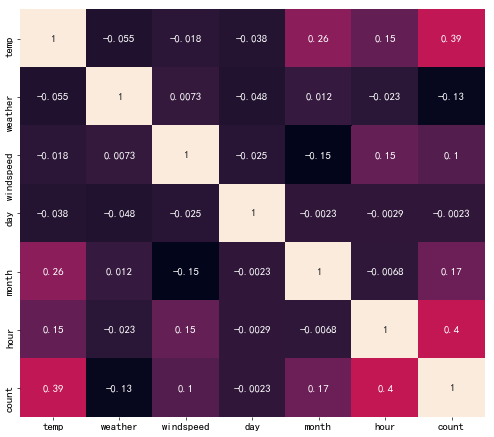

In [85]:
plt.subplots(figsize=(10, 9),dpi=60)
sns.heatmap(corr, annot=True,cbar=False)

plt.show()


**<font color=red>Two parts:</font>**<br>
**<font color=red>1. df_train_target</font>**<br>
**<font color=red>2. df_train_data</font>**

In [53]:
df_train_target = df_train['count'].values
df_train_data = df_train.drop(['count'],axis = 1).values
print('df_train_data shape is ', df_train_data.shape)
print('df_train_target shape is ', df_train_target.shape)

df_train_data shape is  (10886, 13)
df_train_target shape is  (10886,)


# Machine learning

In [1]:
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.learning_curve import learning_curve
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import explained_variance_score

C:\Users\Xinjie\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Xinjie\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)
C:\Users\Xinjie\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning


[Suport Vector Regression](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR)<br>
[Ridge Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)<br>
[Random Forest Regressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [56]:
# Random permutation cross-validation iterator.

#Yields indices to split data into training and test sets.
cv = cross_validation.ShuffleSplit(len(df_train_data), n_iter=4, test_size=0.2,
    random_state=0)

# models
for train_index, test_index in cv:
        print("TRAIN:", train_index, "TEST:", test_index)
        
print('linear model- Ridge')    

for train, test in cv:    
     svc = linear_model.Ridge().fit(df_train_data[train], df_train_target[train])
     print("train score: {0:.3f}, test score: {1:.3f}\n".format(svc.score(df_train_data[train], df_train_target[train]), svc.score(df_train_data[test], df_train_target[test])))
    
print('Suport Vector Regression')
for train, test in cv:
    
    svc = svm.SVR(kernel ='rbf', C = 10, gamma = .001).fit(df_train_data[train], df_train_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train], df_train_target[train]), svc.score(df_train_data[test], df_train_target[test])))
    
print('Random Forest(n_estimators = 100)')
for train, test in cv:    
    svc = RandomForestRegressor(n_estimators = 100).fit(df_train_data[train], df_train_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train], df_train_target[train]), svc.score(df_train_data[test], df_train_target[test])))

TRAIN: [ 3662  8648  7053 ...  9845 10799  2732] TEST: [6638 7975 5915 ... 8217 5916 4630]
TRAIN: [7709 2371 8365 ... 1139 2328 2219] TEST: [6395 6832 9781 ... 3672 8799 7103]
TRAIN: [ 3931  8192  4855 ...  4151   665 10420] TEST: [2075 2707 6480 ... 1247 8910 9071]
TRAIN: [8965 6232 5025 ... 9615  495 1377] TEST: [4024 5941   16 ... 9068 8943 9034]
linear model- Ridge
train score: 1.000, test score: 1.000

train score: 1.000, test score: 1.000

train score: 1.000, test score: 1.000

train score: 1.000, test score: 1.000

Suport Vector Regression
train score: 0.906, test score: 0.904

train score: 0.908, test score: 0.914

train score: 0.908, test score: 0.902

train score: 0.915, test score: 0.880

Random Forest(n_estimators = 100)
train score: 1.000, test score: 1.000

train score: 1.000, test score: 1.000

train score: 1.000, test score: 1.000

train score: 1.000, test score: 0.999



In [57]:
test_index.shape


(2178,)

**<font color=red>Random forest shows the best result</font>**<br><br>
**<font color=red>GridSearch for model tuning</font>**<br><br>

In [60]:
X = df_train_data
y = df_train_target

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.2, random_state=0)

tuned_parameters = [{'n_estimators':[10,100,500]}]   
    
scores = ['r2']

for score in scores:
    
    print(score)
    
    clf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, scoring=score)
    clf.fit(X_train, y_train)

    print("best parameter：")
    print("")
    #best_estimator_ returns the best estimator chosen by the search
    print(clf.best_estimator_)
    print("")
    print("scores:")
    print("")
    #grid_scores_的返回值:
    #    * a dict of parameter settings
    #    * the mean score over the cross-validation folds 
    #    * the list of scores for each fold
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print("")


r2
best parameter：

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

scores:

0.999 (+/-0.000) for {'n_estimators': 10}
1.000 (+/-0.000) for {'n_estimators': 100}
1.000 (+/-0.000) for {'n_estimators': 500}



**<font color=red>To check if it's overfit or underfit</font>**<br>
**<font color=red>learning curve</font>**

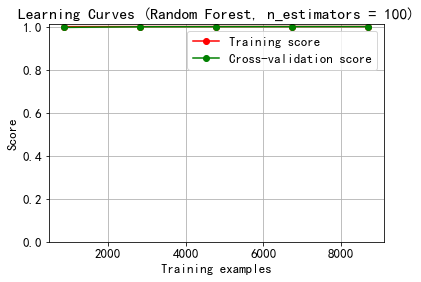

In [107]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curves (Random Forest, n_estimators = 100)"
cv = cross_validation.ShuffleSplit(df_train_data.shape[0], n_iter=10,test_size=0.2, random_state=0)
estimator = RandomForestRegressor(n_estimators = 100)
plot_learning_curve(estimator, title, X, y, (0.0, 1.01), cv=cv, n_jobs=4)

plt.show()